<a href="https://colab.research.google.com/github/TariqAlhathloul/Smart-Street/blob/main/demo_isolating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  ultralytics

## import libraries

In [ ]:
import numpy as np
import os
import cv2
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

In [ ]:
from ultralytics import YOLO

## upload demo image and the model

In [ ]:
image_path = '/content/images/frame_120.jpg'
video_path = '/content/line_video - Trim.MP4'

In [ ]:
model1 = YOLO("/content/best (1).pt", task='segment')
model2 = YOLO('yolov8n-seg.pt')

In [ ]:
# model = YOLO('yolov8n-seg.yaml')
# model = YOLO('yolov8n-seg.pt')
# model = YOLO('yolov8n-seg.yaml').load('yolov8n.pt')

In [ ]:
model1.device

device(type='cpu')

In [ ]:
model1.info

<bound method Model.info of YOLO(
  (model): SegmentationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (3): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (4): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0-1): 2 x Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (5): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (6): C2f(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0-1): 2 x Bottleneck(
            (cv1): Conv(
              (conv): Conv

## read and display the image

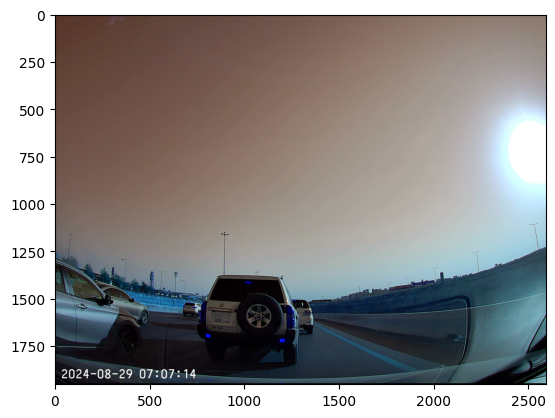

In [ ]:
image = cv2.imread(image_path)
#image = image[:, :, ::-1]
plt.imshow(image)

## send the image to the model

In [ ]:
results1 = model1(image)
results2 = model2(image)


0: 512x640 1 solid-yellow-line, 266.0ms
Speed: 9.2ms preprocess, 266.0ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 5 cars, 422.4ms
Speed: 11.8ms preprocess, 422.4ms inference, 26.5ms postprocess per image at shape (1, 3, 512, 640)


## save the resulting image

In [ ]:
# save the results
results1[0].save('result1.jpg')
results2[0].save('result2.jpg')

'result2.jpg'

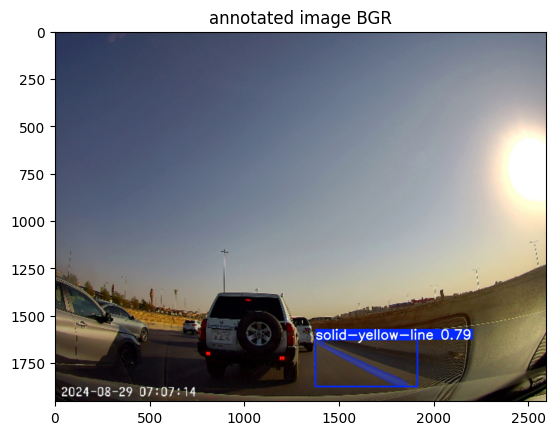

In [ ]:
result_image = cv2.imread('result1.jpg')
plt.title("annotated image BGR")
plt.imshow(result_image[:, :, ::-1])

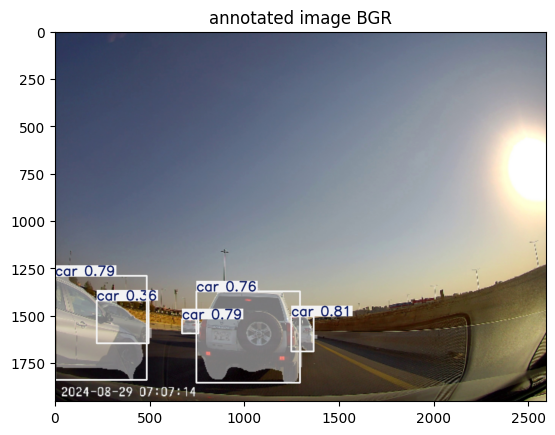

In [ ]:
result_image = cv2.imread('result2.jpg')
plt.title("annotated image BGR")
plt.imshow(result_image[:, :, ::-1])

## i will annotate the image with all the coordinates formats

In [ ]:
pt1 = results1[0].boxes.xywh[0][0:2].numpy()
pt2 = results1[0].boxes.xywh[0][2:4].numpy()

In [ ]:
top_left = (int(pt1[0] - pt2[0] / 2), int(pt1[1] - pt2[1] / 2))
bottom_right = (int(pt1[0] + pt2[0] / 2), int(pt1[1] + pt2[1] / 2))

In [ ]:
top_left

(1375, 1627)

In [ ]:
bottom_right

(1913, 1875)

In [ ]:
xywh_rect = cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

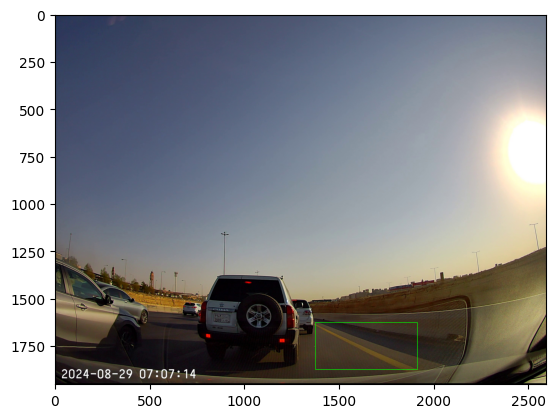

In [ ]:
plt.imshow(xywh_rect[:, :, ::-1])

In [ ]:
# now we to do some simple calculation to know if the car has overtaking byond the solid yellow line
# 1- claculate the center of the solid yellow line, we will call it line_c
# 2- claculate the center of the car, we will call it car_c
# 3- if the line_c < car_c then it's ineed a voilation
# 4- if the line_ > car_c then no voilation
# 5- let's define a function to implement this


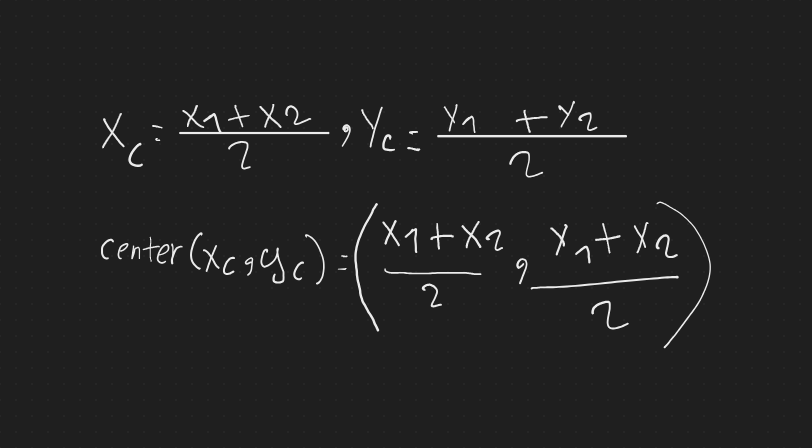

In [ ]:
c = Image.open('/content/Whiteboard 42.png')
display(c)

In [ ]:
def calculate_center(bbox):
  """
  the function takes a bounding box array
  and returns the center of the x and y axis
  """
  center_x = (bbox[0][0] + bbox[0][2]) /2
  center_y = (bbox[0][1] + bbox[0][3]) /2
  return round(center_x.item()), round(center_y.item())

In [ ]:
# let's use the function to calculate the centers of the car and the solid yellow line
line_c = calculate_center(results1[0].boxes.xyxy)
car_c = calculate_center(results2[0].boxes.xyxy)

In [ ]:
print(line_c)
print(car_c)

(1645, 1752)
(1307, 1598)


In [ ]:
# function to check if there is a violation or not
#here we are taking only the x axis of the car center and solid-yellow-line center
#becuse if the x axis of the car center is > x axis of the solid-yellow it's going to be a violation
def is_violation(line_c, car_c):
  return car_c[0] > line_c[0]

In [ ]:
print(is_violation(line_c, car_c))

False


# let's plot the two centers on the image to make sure it's correct

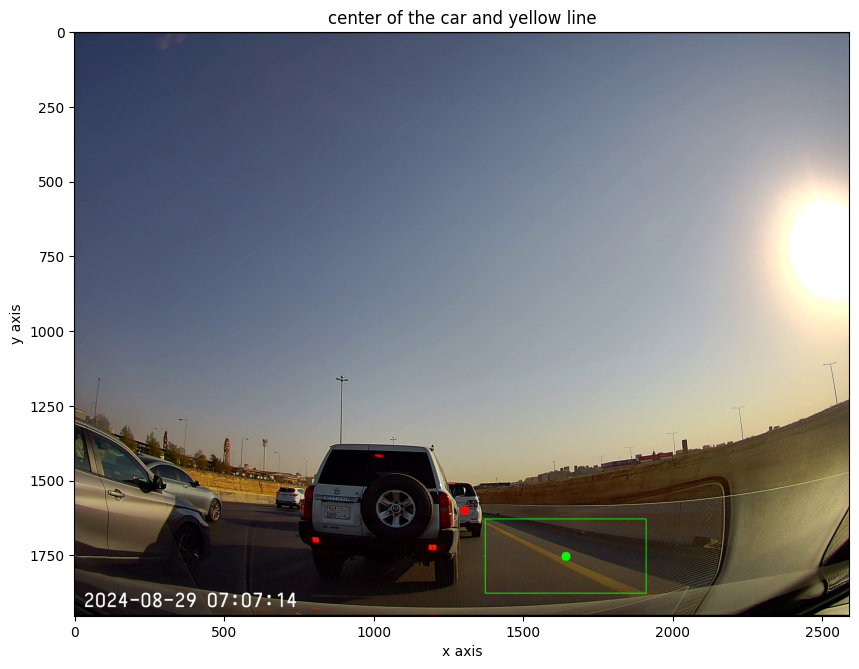

In [ ]:
car_center = cv2.circle(image, car_c, 15, (0, 0, 255), -1)
line_center = cv2.circle(image, line_c, 15, (0, 255, 0), -1)

plt.figure(figsize=(10, 10))
plt.title('center of the car and yellow line')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.imshow(image[:, :, ::-1])


In [ ]:
# good everything works as expected, let's apply ploting centers into a function
def plot_centers(car_c, line_c, image):
  plt.figure(figsize=(10, 10))
  plt.title('center of the car and yellow line')
  plt.xlabel('x axis')
  plt.ylabel('y axis')
  cv2.circle(image, car_c, 15, (0, 0, 255), -1)
  cv2.circle(image, line_c, 15, (0, 255, 0), -1)
  plt.imshow(image[:, :, ::-1])

## let's take another image when car overtaking from right

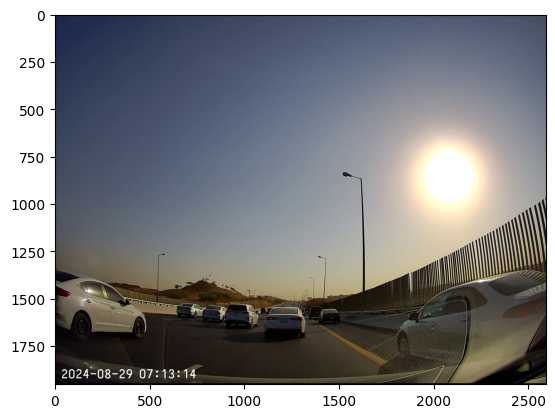

In [ ]:
img = cv2.imread('/content/images2/frame_120.jpg')
plt.imshow(img[:, :, ::-1])

In [ ]:
results1 = model1(img)
results2 = model2(img)


0: 512x640 1 solid-yellow-line, 791.4ms
Speed: 8.0ms preprocess, 791.4ms inference, 7.8ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 8 cars, 363.9ms
Speed: 7.9ms preprocess, 363.9ms inference, 29.5ms postprocess per image at shape (1, 3, 512, 640)


In [ ]:
line_c = calculate_center(results1[0].boxes.xyxy)
car_c = calculate_center(results2[0].boxes.xyxy[[5]])# 5

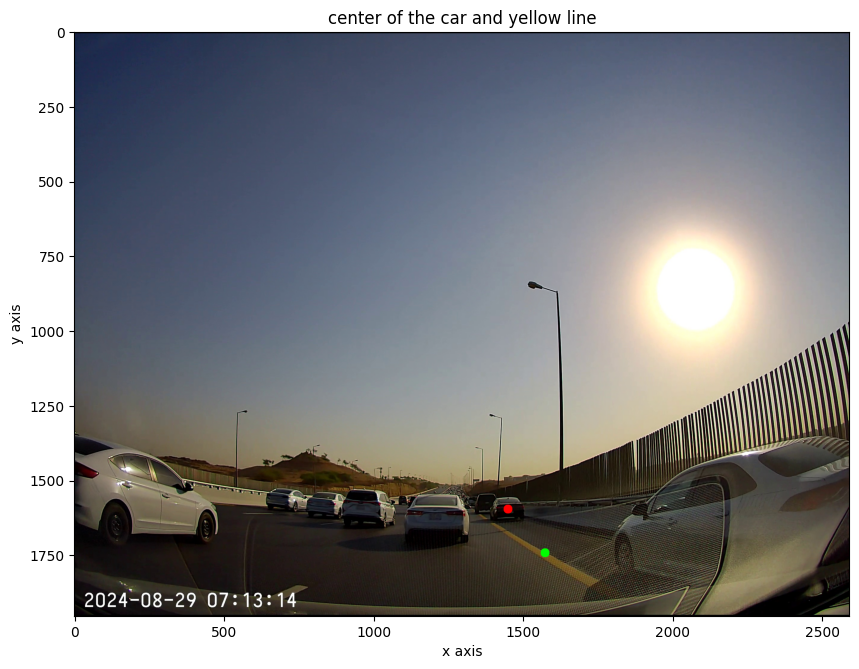

In [ ]:
plot_centers(car_c, line_c, img)

In [ ]:
is_violation(line_c=line_c, car_c=car_c)

False

In [ ]:
line_c

(1575, 1740)

In [ ]:
car_c

(1451, 1594)

In [ ]:
import numpy as np

car_c = np.array(car_c) # Convert car_c to a NumPy array
line_c = np.array(line_c) # Convert line_c to a NumPy array
d = car_c - line_c # Perform element-wise subtraction

In [ ]:
d

array([-124, -146])

In [ ]:
# TODO take the centers of the cars on the right only

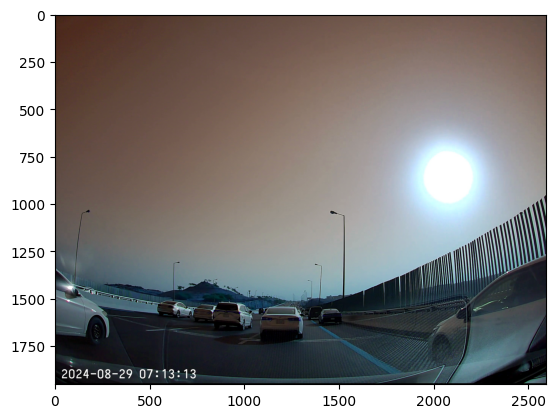

In [ ]:
image = cv2.imread('/content/images2/frame_90.jpg')

height, width, _ = image.shape

# here I'm trying to define a region of interest
left_side = image[:, :width // 2]  # take the left side of the image
right_side = image[:, width // 2:]  # .... right side of the image

# original image
plt.imshow(image)

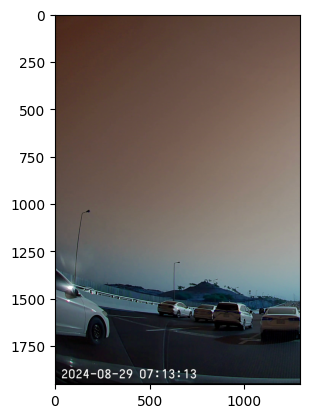

In [ ]:
plt.imshow(left_side)

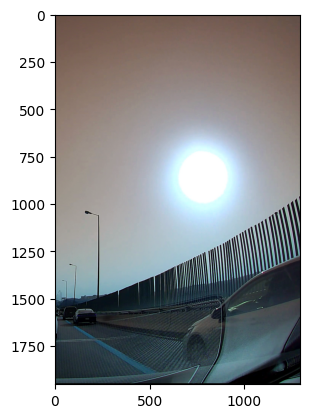

In [ ]:
plt.imshow(right_side)

In [ ]:
annotated_image = results1[0]

In [ ]:
help(annotated_image)

Help on Results in module ultralytics.engine.results object:

class Results(ultralytics.utils.SimpleClass)
 |  Results(orig_img, path, names, boxes=None, masks=None, probs=None, keypoints=None, obb=None, speed=None) -> None
 |  
 |  A class for storing and manipulating inference results.
 |  
 |  This class encapsulates the functionality for handling detection, segmentation, pose estimation,
 |  and classification results from YOLO models.
 |  
 |  Attributes:
 |      orig_img (numpy.ndarray): Original image as a numpy array.
 |      orig_shape (Tuple[int, int]): Original image shape in (height, width) format.
 |      boxes (Boxes | None): Object containing detection bounding boxes.
 |      masks (Masks | None): Object containing detection masks.
 |      probs (Probs | None): Object containing class probabilities for classification tasks.
 |      keypoints (Keypoints | None): Object containing detected keypoints for each object.
 |      obb (OBB | None): Object containing oriented boun

In [ ]:
results1[0].keypoints # is None

In [ ]:
results1[0].boxes.xyxy
#tensor([[1375.9053, 1627.6577, 1913.7604, 1875.8130]])

tensor([[1396.0820, 1636.0255, 1753.1494, 1843.7150]])

In [ ]:
results1[0].boxes.conf

tensor([0.7204])

## remove the bounding box and keep the segmentation

In [ ]:
#mask = results[0].masks.data.numpy()
original_image = results1[0].orig_img
b_mask = np.zeros(original_image.shape[:2], np.uint8) #binary mask

#original_image = original_image[:, :, ::-1]

In [ ]:
# contours results
contours = results1[0].masks.xy.pop()
contours = contours.astype(np.int32) # change dtype
contours = contours.reshape(-1, 1, 2)

In [ ]:
# drow the segmentiona
image_masked = cv2.drawContours(b_mask, [contours], -1, (255, 255, 255), cv2.FILLED)

In [ ]:
type(image_masked)

numpy.ndarray

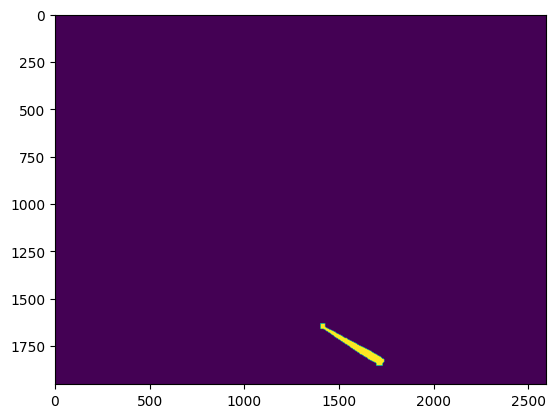

In [ ]:
plt.imshow(image_masked)

In [ ]:
image_masked_rgb = cv2.cvtColor(b_mask, cv2.COLOR_GRAY2BGR)

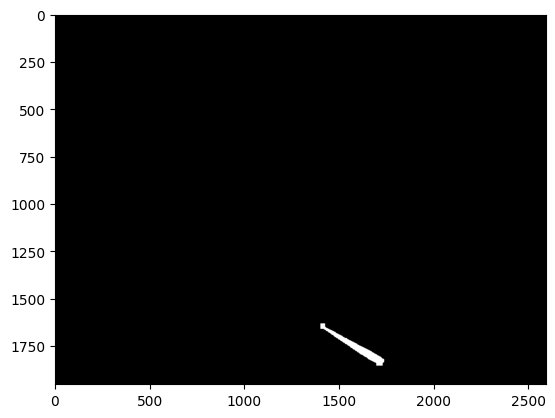

In [ ]:
plt.imshow(image_masked_rgb)

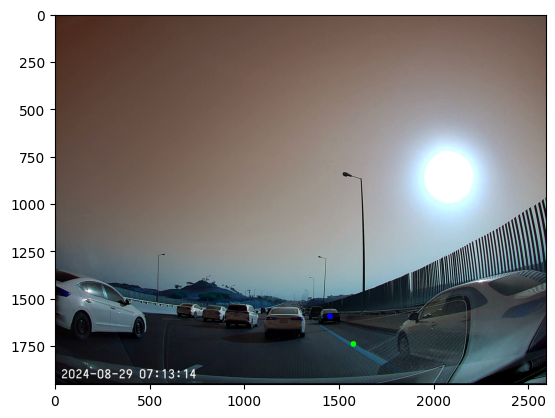

In [ ]:
plt.imshow(original_image)

In [ ]:
def extract_frames(input_video_path:str ,output_images_path:str  , frame_rate_per_second: int):
    """
    input_video_path: path to the video file
    output_images_path: path where extracted frames will be saved
    frame_rate_per_second: the rate at which to extract the frames

    example: if you set the frame_rate_per_second to 1, in a 15 seconds video it will extract 15 frames
    if it's set to 2 it will extract 30 images.
    """
    assert frame_rate_per_second > 0, "frame rate must be greater than 0"
    assert input_video_path.endswith('.MP4'), "input video must be in mp4 format"
    assert os.path.exists(input_video_path), "input video path does not exist"

    if not os.path.exists(output_images_path):
        os.makedirs(output_images_path, exist_ok=True)

    frame_count = 0
    counter = 0

    cap = cv2.VideoCapture(input_video_path)
    assert cap.isOpened(), "Error opening video file"

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            print("Reached the end of the video")
            break
        frame_count += 1
        if frame_count % int(cap.get(5) / frame_rate_per_second) == 0:
            counter +=1
            cv2.imwrite(f"{output_images_path}/frame_{frame_count}.jpg", frame)

    cap.release()
    print(f"Extracted {counter} frames successfully to the path: {output_images_path}")

In [ ]:
extract_frames('/content/cross-4 - Trim2.MP4', '/content/images2', 1)

Reached the end of the video
Extracted 4 frames successfully to the path: /content/images2
